# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import random
import gc
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
TRAIN_DIR_PATH = "data_augmentation/Train"
TEST_DIR_PATH = "data_augmentation/Test"

In [3]:
training_data_size = []
training_labels = []
print("[INFO] Analysing training data...\n")
for target in os.listdir(TRAIN_DIR_PATH):
    training_data_size.append(len(os.listdir(os.path.join(TRAIN_DIR_PATH, target))))
    training_labels.append(target)
    print(f"Target name: {target:<15} | Number of available samples: {len(os.listdir(os.path.join(TRAIN_DIR_PATH, target)))}")

[INFO] Analysing training data...

Target name: Bacterial spot  | Number of available samples: 704
Target name: Black mold      | Number of available samples: 428
Target name: Gray spot       | Number of available samples: 537
Target name: health          | Number of available samples: 678
Target name: Late blight     | Number of available samples: 627
Target name: powdery mildew  | Number of available samples: 1004


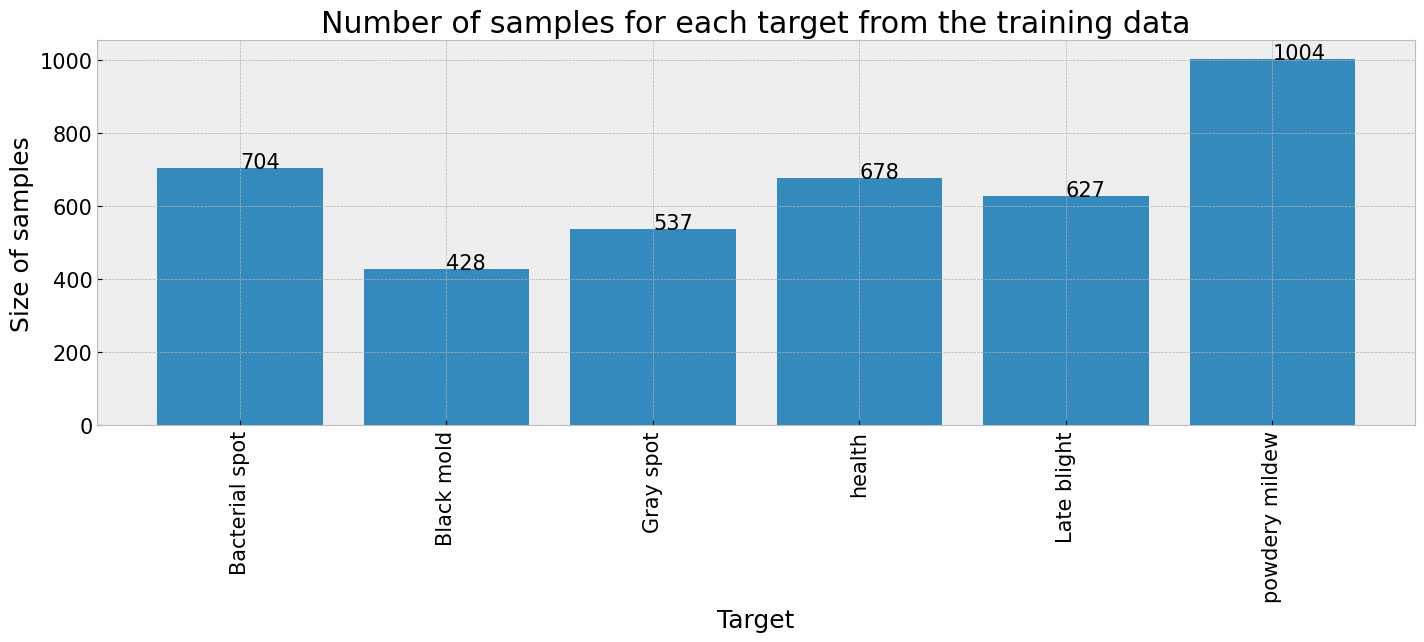

In [4]:
with plt.style.context(style="bmh"):
    plt.figure(figsize=(17,5))
    plt.rcParams['font.size']=15
    plt.bar(training_labels, training_data_size)
    plt.xlabel("Target")
    plt.ylabel("Size of samples")
    plt.title("Number of samples for each target from the training data")
    for i in range(len(training_labels)):
        plt.annotate(str(training_data_size[i]), (training_labels[i], training_data_size[i]))
    plt.xticks(rotation=90)
    plt.show()

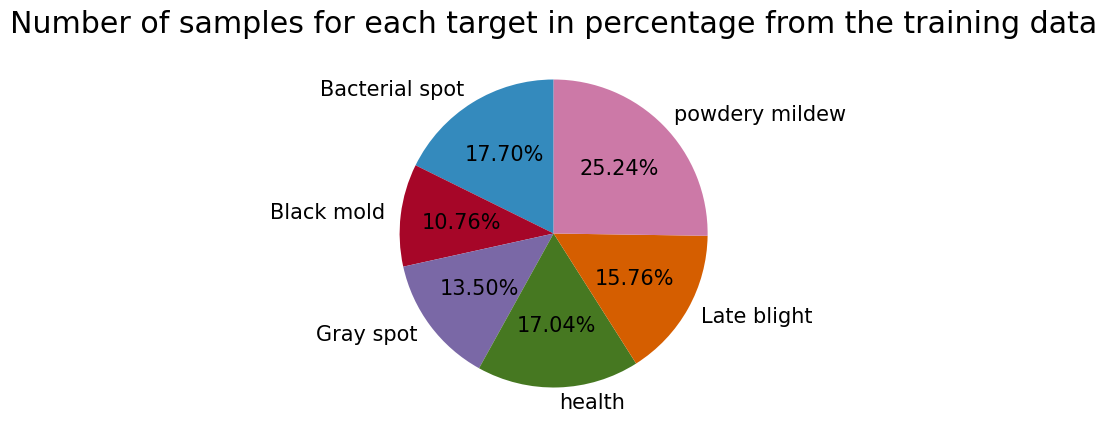

In [5]:
with plt.style.context(style="bmh"):
    plt.figure(figsize=(17,5))
    plt.rcParams['font.size']=15
    plt.pie(labels=training_labels, x=training_data_size, startangle=90, autopct="%.2f%%")
    plt.title("Number of samples for each target in percentage from the training data")
    plt.show()

In [6]:
testing_data_size = []
testing_labels = []
print("[INFO] Analysing testing data...\n")
for target in os.listdir(TEST_DIR_PATH):
    testing_data_size.append(len(os.listdir(os.path.join(TEST_DIR_PATH, target))))
    testing_labels.append(target)
    print(f"Target name: {target:<15} | Number of available samples: {len(os.listdir(os.path.join(TEST_DIR_PATH, target)))}")

[INFO] Analysing testing data...

Target name: Bacterial spot  | Number of available samples: 176
Target name: Black mold      | Number of available samples: 108
Target name: Gray spot       | Number of available samples: 135
Target name: health          | Number of available samples: 170
Target name: Late blight     | Number of available samples: 157
Target name: powdery mildew  | Number of available samples: 252


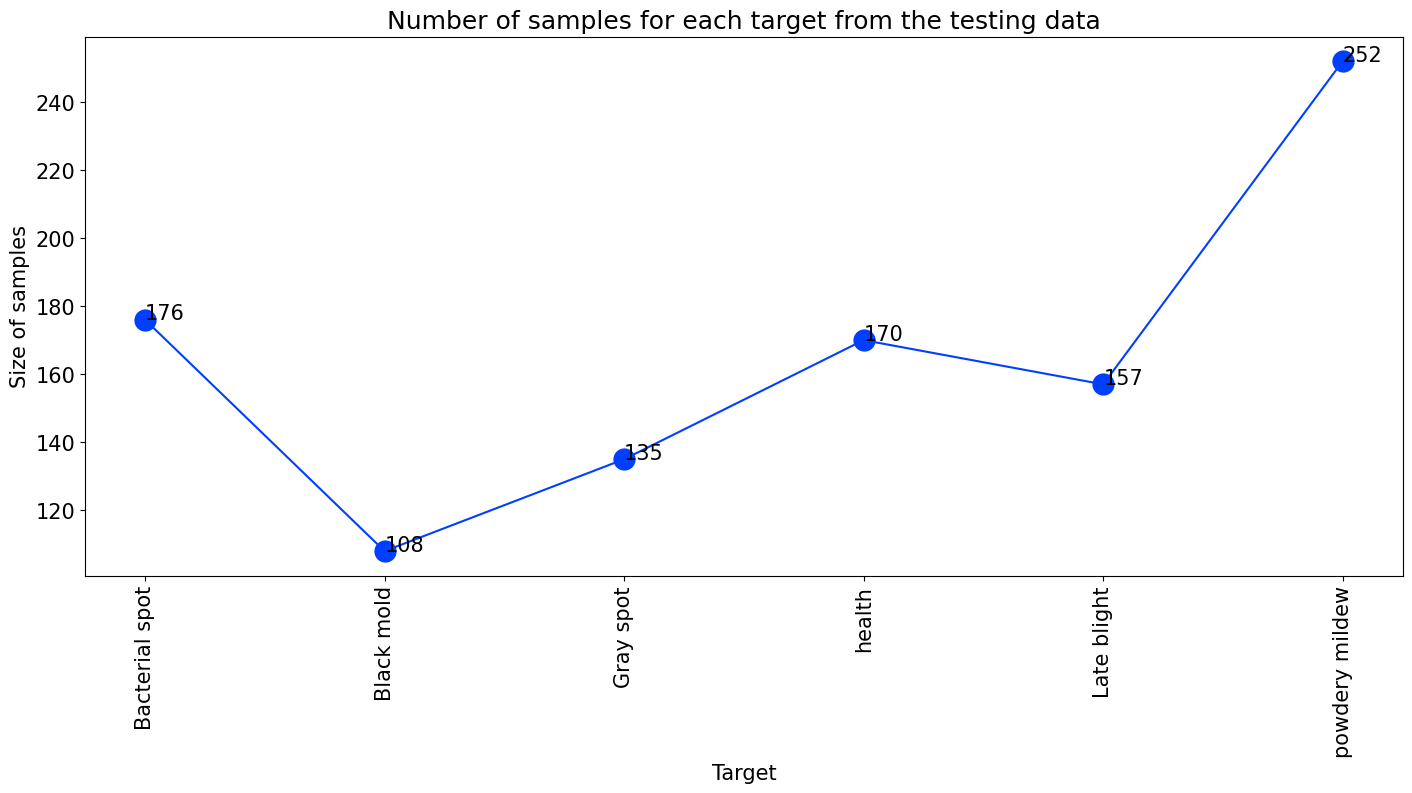

In [7]:
with plt.style.context(style="seaborn-bright"):
    plt.figure(figsize=(17,7))
    plt.rcParams['font.size']=15
    plt.plot(testing_labels, testing_data_size, marker='o', markersize=15)
    plt.xlabel("Target")
    plt.ylabel("Size of samples")
    plt.title("Number of samples for each target from the testing data")
    for i in range(len(testing_labels)):
        plt.annotate(str(testing_data_size[i]), (testing_labels[i], testing_data_size[i]))
    plt.xticks(rotation=90)
    plt.show()

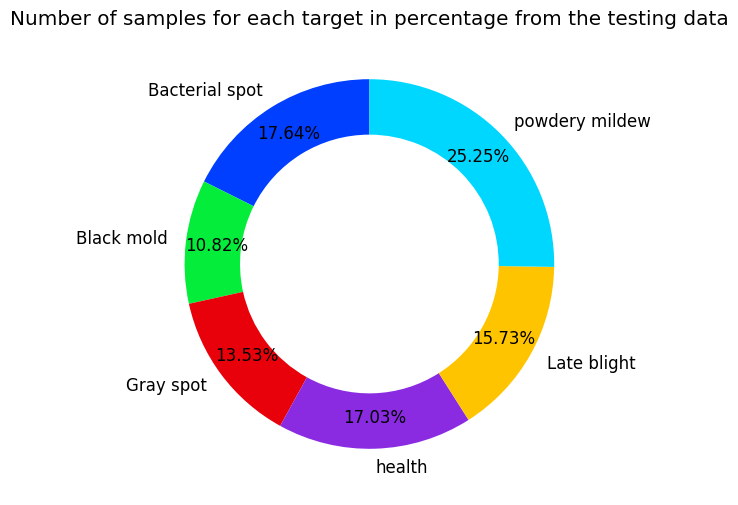

In [8]:
with plt.style.context(style="seaborn-bright"):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.size'] = 12
    plt.pie(testing_data_size,
            labels=testing_labels,
            autopct="%.2f%%",
            startangle=90,
            wedgeprops=dict(width=0.3),
           pctdistance=0.83)
    center_circle = plt.Circle((0, 0), 0.1, color='white', fc='white', linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title("Number of samples for each target in percentage from the testing data")
    plt.show()

In [9]:
IMAGE_SIZE = (128, 128)
class_labels = os.listdir(TRAIN_DIR_PATH)
class_labels.sort()

print(class_labels)

['Bacterial spot', 'Black mold', 'Gray spot', 'Late blight', 'health', 'powdery mildew']


## Loading training samples

In [10]:
training_data = []
training_data_labels = []

for idx, target in enumerate(class_labels):
    print(f"[INFO] Loading images from the target {target}...")
    images_names = os.listdir(os.path.join(TRAIN_DIR_PATH, target))
    for image_name in tqdm(images_names):
        filepath = os.path.join(TRAIN_DIR_PATH, target, image_name)
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_CUBIC)
        image = image.astype(np.float32)
        image = image / 255.0
        training_data.append(image)
        training_data_labels.append(idx)

[INFO] Loading images from the target Bacterial spot...


100%|███████████████████████████████████████████████████████████████████████████████| 704/704 [00:01<00:00, 527.62it/s]


[INFO] Loading images from the target Black mold...


100%|███████████████████████████████████████████████████████████████████████████████| 428/428 [00:00<00:00, 541.51it/s]


[INFO] Loading images from the target Gray spot...


100%|███████████████████████████████████████████████████████████████████████████████| 537/537 [00:01<00:00, 513.35it/s]


[INFO] Loading images from the target Late blight...


100%|███████████████████████████████████████████████████████████████████████████████| 627/627 [00:01<00:00, 585.56it/s]


[INFO] Loading images from the target health...


100%|███████████████████████████████████████████████████████████████████████████████| 678/678 [00:01<00:00, 524.34it/s]


[INFO] Loading images from the target powdery mildew...


100%|█████████████████████████████████████████████████████████████████████████████| 1004/1004 [00:01<00:00, 502.30it/s]


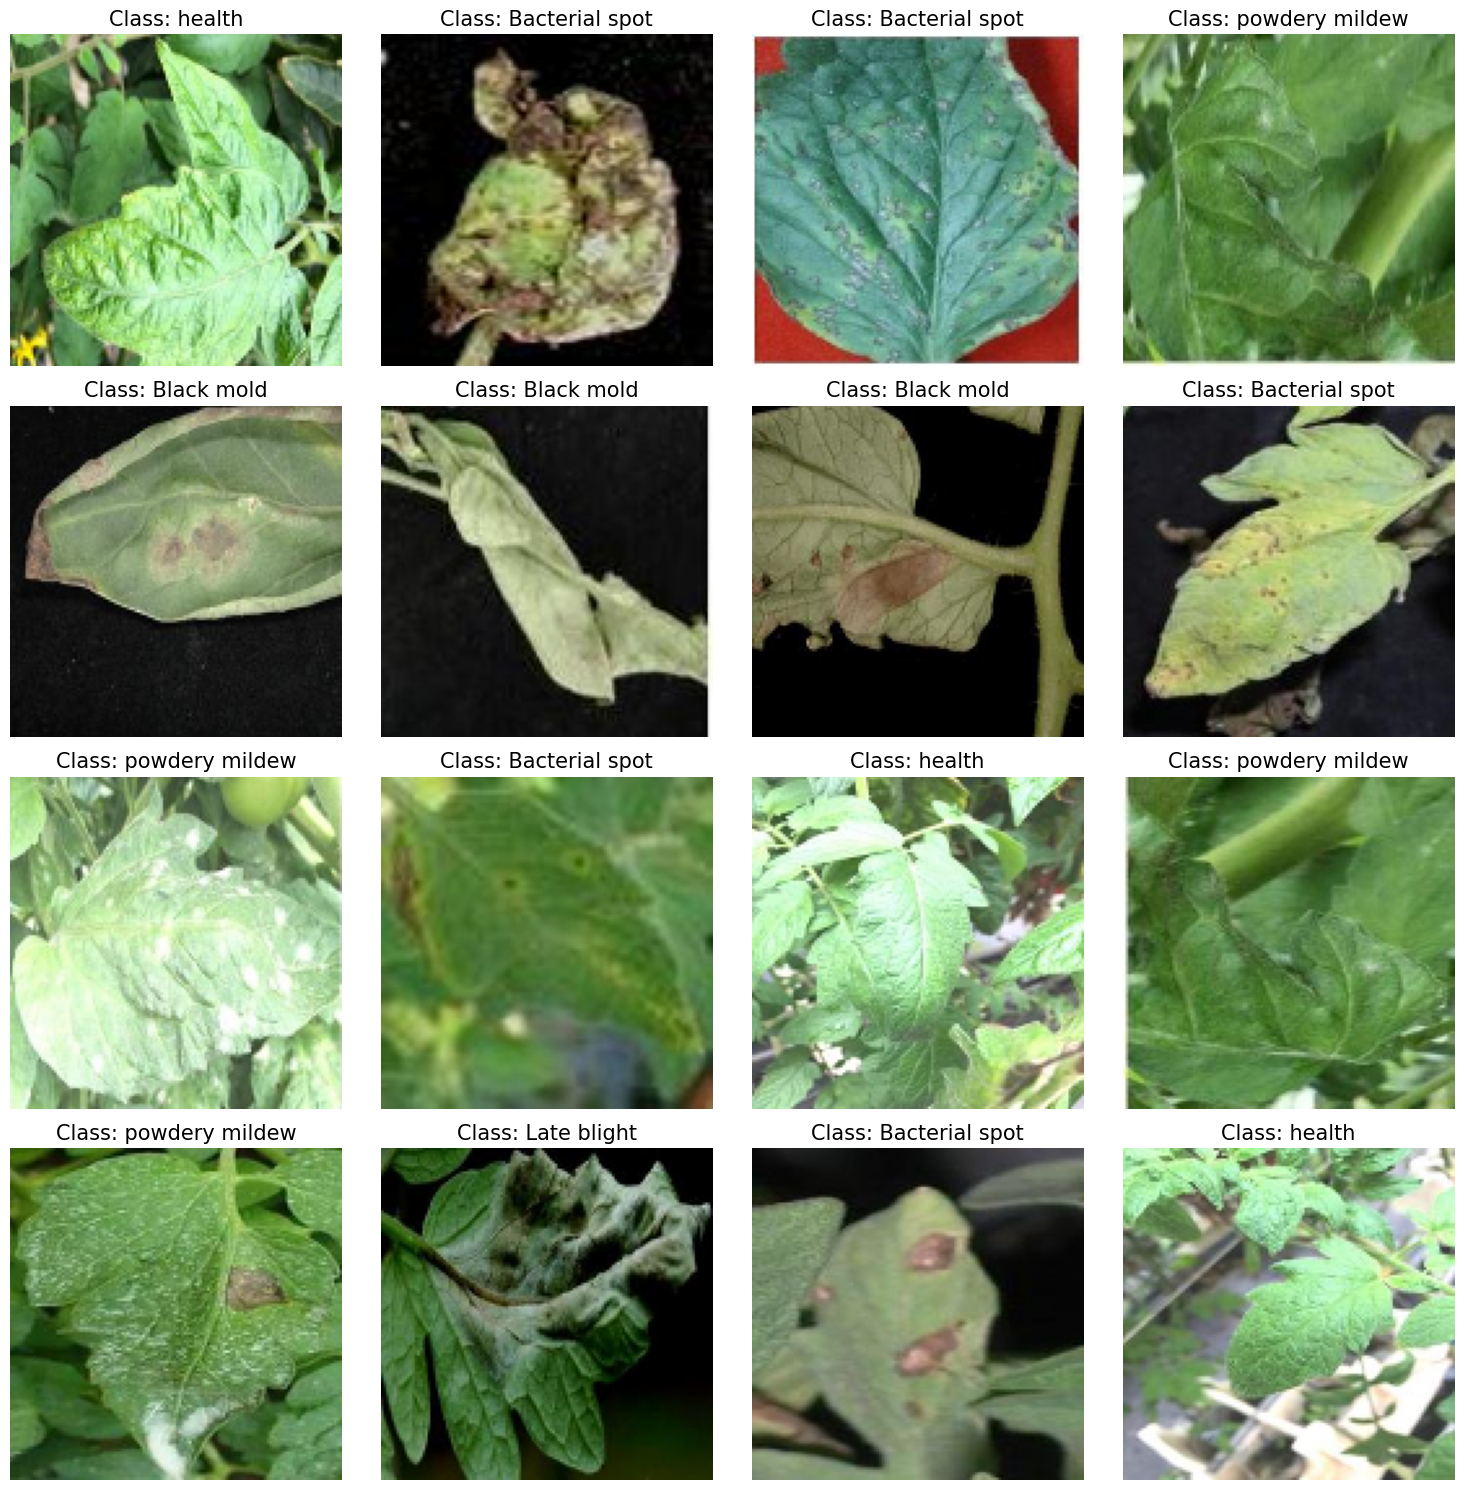

In [11]:
def show_images(images,labels,str_labels):
    plt.figure(figsize=(15,15))
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        idx=random.randint(0,len(images)-1)
        plt.imshow(images[idx])
        plt.axis('off')
        plt.title(label=f"Class: {str_labels[labels[idx]]}", fontsize=15)
    plt.tight_layout()
    plt.show()

show_images(training_data, training_data_labels, class_labels)

In [12]:
testing_data = []
testing_data_labels = []

for idx, target in enumerate(class_labels):
    print(f"[INFO] Loading images from the target {target}...")
    images_names = os.listdir(os.path.join(TEST_DIR_PATH, target))
    for image_name in tqdm(images_names):
        filepath = os.path.join(TEST_DIR_PATH, target, image_name)
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_CUBIC)
        image = image.astype(np.float32)
        image = image / 255.0
        testing_data.append(image)
        testing_data_labels.append(idx)

[INFO] Loading images from the target Bacterial spot...


100%|████████████████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 99.48it/s]


[INFO] Loading images from the target Black mold...


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 106.40it/s]


[INFO] Loading images from the target Gray spot...


100%|███████████████████████████████████████████████████████████████████████████████| 135/135 [00:01<00:00, 102.66it/s]


[INFO] Loading images from the target Late blight...


100%|███████████████████████████████████████████████████████████████████████████████| 157/157 [00:01<00:00, 103.59it/s]


[INFO] Loading images from the target health...


100%|███████████████████████████████████████████████████████████████████████████████| 170/170 [00:01<00:00, 110.63it/s]


[INFO] Loading images from the target powdery mildew...


100%|███████████████████████████████████████████████████████████████████████████████| 252/252 [00:01<00:00, 127.49it/s]


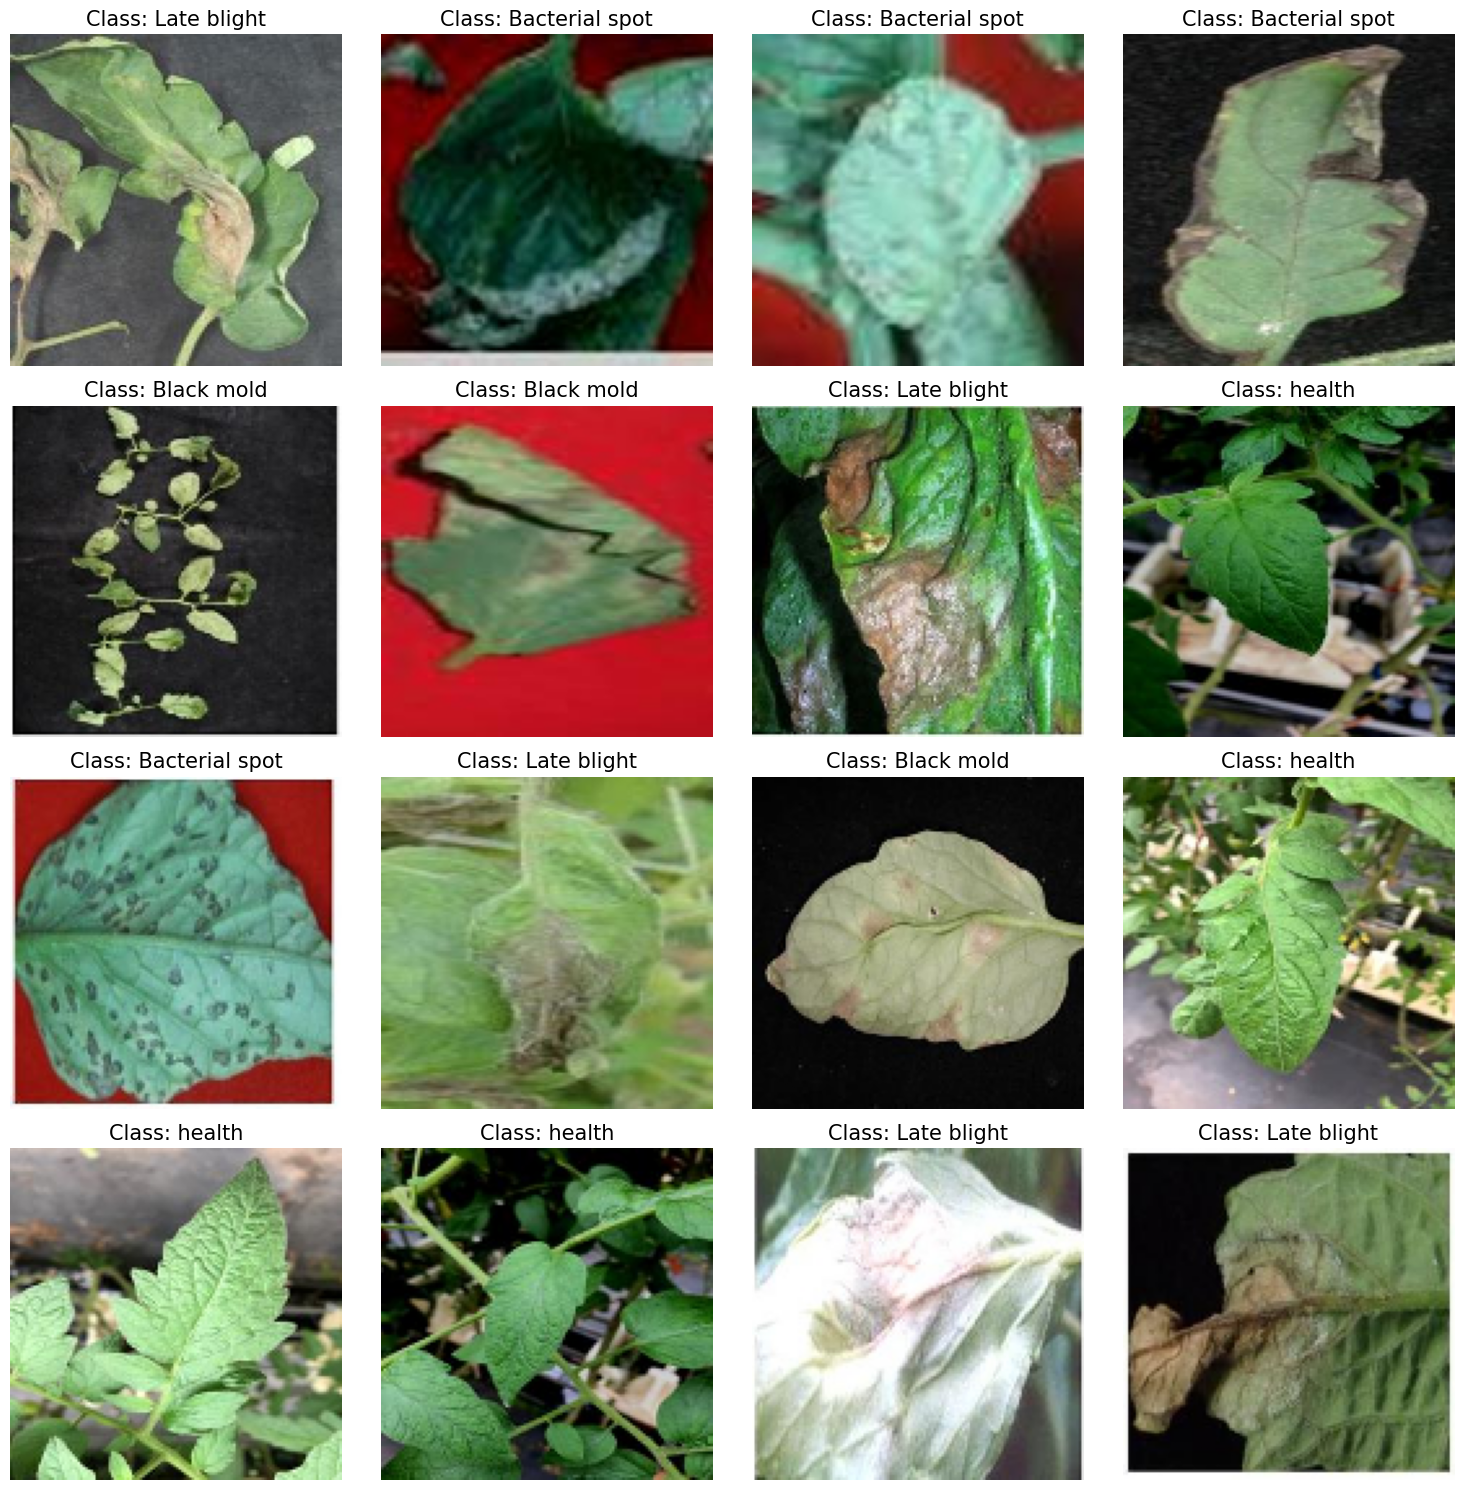

In [13]:
show_images(testing_data, testing_data_labels, class_labels)

In [14]:
training_data = np.array(training_data)
training_data_labels = np.array(training_data_labels)

print(training_data.shape, training_data_labels.shape)

(3978, 128, 128, 3) (3978,)


In [15]:
testing_data = np.array(testing_data)
testing_data_labels = np.array(testing_data_labels)

print(testing_data.shape, testing_data_labels.shape)

(998, 128, 128, 3) (998,)


In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet201
training_data_labels = tf.keras.utils.to_categorical(training_data_labels)
testing_data_labels = tf.keras.utils.to_categorical(testing_data_labels)

In [17]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=len(class_labels), activation='softmax'))

74850304/74836368 [==============================] - 5s 0us/step


In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
base_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
EPOCHS = 30

history = model.fit(
    x=training_data,
    y=training_data_labels,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(testing_data, testing_data_labels),
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0)
    ]
)

Epoch 1/30
125/125 [==============================] - 214s 2s/step - loss: 1.1692 - accuracy: 0.5596 - val_loss: 0.8374 - val_accuracy: 0.6994 - lr: 0.0010
Epoch 2/30
 93/125 [=====================>........] - ETA: 40s - loss: 0.7080 - accuracy: 0.7510

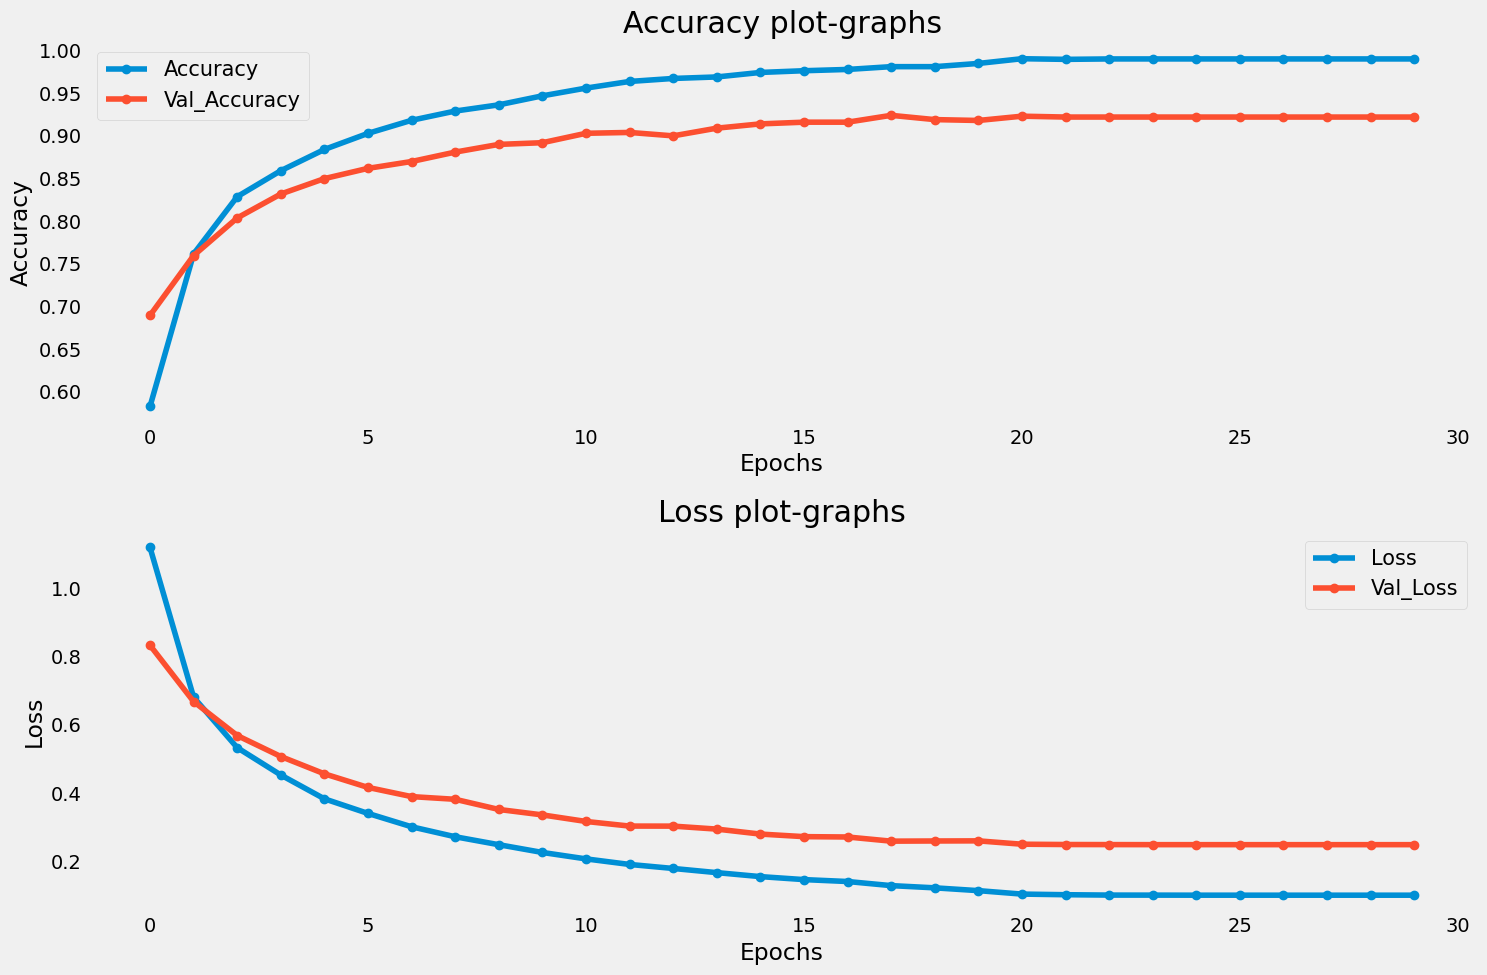

In [23]:
with plt.style.context(style='fivethirtyeight'):
    fig,axes=plt.subplots(nrows=2, ncols=1, figsize=(15,10))
    plt.rcParams["font.size"]=15
    axes[0].plot(history.history['accuracy'],label='Accuracy',marker='o')
    axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy',marker='o')
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[0].grid()
    axes[1].plot(history.history['loss'],label='Loss',marker='o')
    axes[1].plot(history.history['val_loss'],label='Val_Loss',marker='o')
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    axes[1].grid()
    fig.tight_layout()
    plt.show()

# Model Prediction

In [24]:
model_probs = model.predict(testing_data, verbose=1)
print(model_probs)

32/32 [==============================] - 4s 29ms/step
[[2.03743070e-01 1.64148893e-04 7.94666633e-02 7.42675886e-02
  8.50655306e-06 6.42350078e-01]
 [2.61304826e-01 1.04835285e-02 1.15165420e-01 4.03550565e-01
  2.36449763e-04 2.09259212e-01]
 [8.17895055e-01 8.29172495e-04 1.06469030e-02 3.30218449e-02
  1.85183226e-03 1.35755330e-01]
 ...
 [1.94382370e-02 1.64373918e-03 2.65014231e-01 2.53883332e-01
  3.44187129e-06 4.60016966e-01]
 [1.92786730e-03 1.53754590e-05 1.35516766e-02 3.21364462e-01
  1.58506748e-03 6.61555588e-01]
 [3.22594831e-04 4.65621473e-04 2.03495007e-02 1.52493352e-02
  1.77065267e-05 9.63595212e-01]]


In [25]:
model_labels=np.argmax(model_probs, axis=1)
print(model_labels.tolist())

[5, 3, 0, 3, 0, 5, 3, 0, 0, 3, 0, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 5, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 

In [26]:
true_labels=np.argmax(testing_data_labels,axis=1)
print(true_labels.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

# Result Analysis

***Accuracy Score***

In [27]:
model_accuracy = accuracy_score(y_true=true_labels, y_pred=model_labels)
print(f"Validation accuracy of DenseNet201 model is {model_accuracy*100.0:.2f}%")

Validation accuracy of DenseNet201 model is 92.18%


***Classification Report***

In [28]:
print(classification_report(y_true=true_labels, y_pred=model_labels, target_names=class_labels))

                precision    recall  f1-score   support

Bacterial spot       0.92      0.91      0.91       176
    Black mold       0.91      0.87      0.89       108
     Gray spot       0.88      0.84      0.86       135
   Late blight       0.86      0.91      0.88       157
        health       0.99      0.99      0.99       170
powdery mildew       0.94      0.96      0.95       252

      accuracy                           0.92       998
     macro avg       0.92      0.91      0.92       998
  weighted avg       0.92      0.92      0.92       998



***Confusion Matrix***

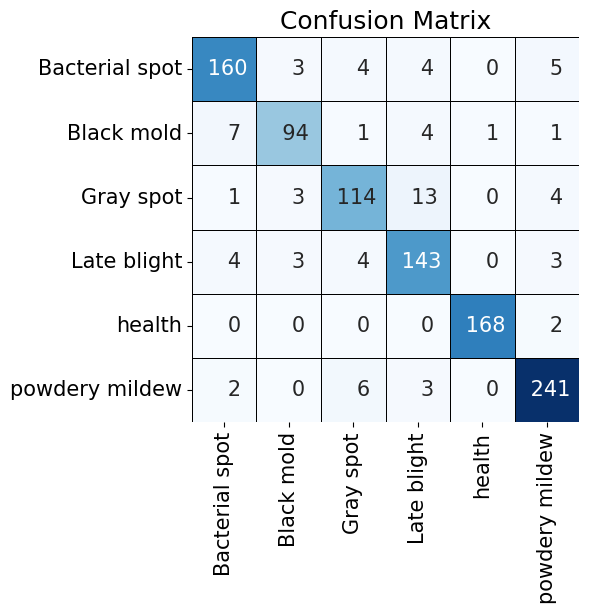

In [29]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(data=confusion_matrix(y_true=true_labels,y_pred=model_labels),
            cmap=plt.cm.Blues,
            annot=True,
            fmt='4d',
            cbar=False,
            linecolor='black',
            linewidths=0.5,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(label='Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Model Saving

In [30]:
model.save(filepath='models/DenseNet201_model.h5')